<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/Copy_of_TRAIN_AWS_Part_II_Day_3_Lab_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #3: Introduction to Neural Networks in PyTorch**
---


### **Description**
This lab focuses on building, visualizing, and training neural networks using the `pytorch` Python library. This will cover key topics including loading data for deep learning models, building neural networks by layer (sequential models), and visualizing neural networks.

<br>

### **Lab Structure**
* **Part 1**: [Loading Data for Deep Learning](#p1)

* **Part 2**: [Building and Visualizing a Neural Network](#p2)

  >  **Part 2.1**: [Simple Neural Networks](#p2.1)

  >  **Part 2.2**: [Adding Activation Functions](#p2.2)


* **Part 3**: [Training](#p3)
  >  **Part 3.1**: [Training a Neural Network](#p3.1)

  >  **Part 3.2**: [Different Activation Functions](#p3.2)


* **Part 4**: [[ADDITIONAL PRACTICE] Independent Work](#p4)

* **Part 5**: [[ADDITIONAL PRACTICE] Building Neural Networks](#p5)




<br>

### **Learning Objectives**
By the end of this lab, you will:
* Recognize the basic components of deep learning with pytorch/fast.ai.
* Recognize how to build a basic sequential model.

<br>


### **Cheat Sheets**:
[Deep Learning with pytorch](https://docs.google.com/document/d/1yCDNlluOSp3HId_WUXQqi8AH0hCMOgZbDKzvCrRfrY8/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
!pip --quiet install torchview
!pip --quiet install torch
!pip --quiet install graphviz
!pip --quiet install fastai
!conda install -q python-graphviz

import torch
import torch.nn as nn
from torchview import draw_graph
from fastai.tabular.all import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

Solving environment: ...working... done

# All requested packages already installed.



<a name="p1"></a>

---
## **Part #1: Loading Data for Deep Learning**
---

Recall the steps for Deep Learning:

1. Import and split the data into a train/validation set
2. Determine the dimensions of the data
3. Initialize the Network Model
4. Add an Input layer to the model
5. Add the hidden Layers to the model
6. Add the output layer
7. Fit the model
8. Evaluate the model

Deep learning requires *a lot* of data. This requires special tools to handle large datasets. In PyTorch, we use DataLoaders.

Let's use the California housing dataset to practice loading data. We will revisit this dataset in the analysis in Part 3. For now, let's just focus on the syntax for loading the data.


#### **Problem #1: Split the data into training and validation datasets.**

---

In [ ]:
data = fetch_california_housing()
X = data['data']
y = data['target']

# Split the data into training and validation sets with a 80/20 split
X_train, X_valid, y_train, y_valid = # WRITE YOUR CODE HERE

#### **Problem #2: Convert the data to PyTorch tensors.**
---

*Hint*: Remember to unsqueeze `y_train` and `y_valid`.

In [ ]:
# Convert the numpy arrays to PyTorch tensors with float32 data type
X_train = # WRITE YOUR CODE HERE
y_train = # WRITE YOUR CODE HERE

X_valid = # WRITE YOUR CODE HERE
y_valid = # WRITE YOUR CODE HERE

#### **Problem #3: Define the DataLoaders.**
---

We will provide the code for defining the datasets. Fill in the code below to define each DataLoader and define the DataLoaders object that contains both. Use the following parameters for each DataLoader:

* `batch_size=64`
* `shuffle=True`



In [ ]:
# Create dataset object
train_ds = list(zip(X_train, y_train))
valid_ds = list(zip(X_valid, y_valid))

# Define the DataLoaders
train_dl = # WRITE YOUR CODE HERE
valid_dl = # WRITE YOUR CODE HERE

dls = # WRITE YOUR CODE HERE

---

<center>

#### **Wait for Your Instructor to Continue**

---

<a name="p2"></a>

---
## **Part #2: Building and Visualizing a Neural Network**
---

Let's start by familiarizing ourselves with keras and visualizing a neural network. In this part, we will focus on Steps #3 - 6:

1. Import and split the data into a train/test set
2. Determine the dimensions of the data
3. **Initialize the Network Model**
4. **Add an Input layer to the model**
5. **Add the hidden Layers to the model**
6. **Add the output layer**
7. Fit the model
8. Evaluate the model

<a name="p2.1"></a>

### **Part #2.1: Simple Neural Networks**
---

#### **Steps #3 - 4: Initialize Neural Net and Add Input Layer**
---

Intialize a neural network using `nn.Sequential()` and use `add_module` to add an input layer with input size 8 and output size 10.

#### **Step #5: Add Hidden Layers**
---

Now, add two hidden layers such that:

* The first hidden layer has `10` neurons

* The second hidden layer has `6` neurons and an output size of 8

#### **Step #6: Add Output Layer**
---

Lastly, add an output layer that has 1 output node. This could be used for tasks such as binary classification (0 or 1 output) or regression as we will see.

---

<center>

#### **Wait for Your Instructor to Continue**

---

#### **Problem #2.1.1**

Confirm we've made our model correctly using the `draw_graph` function.

**Run the code below to perform this step.**

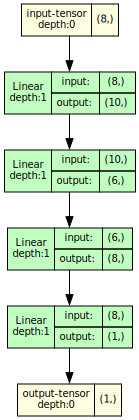

In [ ]:
model_graph = draw_graph(model, input_size=(8,))
model_graph.visual_graph

#### **Problem #2.1.2**

Now, make and visualize a neural net with the following structure:
* An input layer with 3 neurons
* One hidden layer with 9 neurons
* An output layer with 4 neurons

In [ ]:
model = # COMPLETE THIS LINE

# Input Layer
model.add_module('input', nn.Linear(# COMPLETE THIS LINE
model.add_module('output', n# COMPLETE THIS LINE

# Visualizing the network
model_graph = draw_graph(model, input_size=(# COMPLETE THIS LINE
model_graph.visual_graph

#### **Problem #2.1.3**


`Sequential(...)` can also take a list of layers that you want to add. Complete the code below to recreate the same NN from the problem above.

<br>

**NOTE**: This is just a more succinct way to acheive the same thing that's worth knowing about. In the beginning, it can often be helpful to take the other approach since it emphasizes the process of building the NN layer by layer.

In [ ]:
model = nn.Sequential(
    # COMPLETE THIS LINE,
    # COMPLETE THIS LINE
)

# Visualizing the network
model_graph = draw_graph(model, input_size=(3,))
model_graph.visual_graph

---
#### **Try Problems #2.1.4 - #2.1.6 on your own.**
---

#### **Problem #2.1.4**

Using either approach we've seen (Problems #1 - 2 or Problem #3), make and visualize a neural net with the following structure:
* An input layer with 10 neurons
* One hidden layer with 256 neurons
* Another hidden layer with 128 neurons
* Another hidden layer with 64 neurons
* Another hidden layer with 32 neurons
* Another hidden layer with 16 neurons
* An output layer with 4 neurons

In [ ]:
# Build the model
model = # COMPLETE THIS LINE

# Input Layer
model.add_module('input', # COMPLETE THIS LINE

# Hidden Layers
model.add_module('hidden1', # COMPLETE THIS LINE
model.add_module('hidden2', # COMPLETE THIS LINE
model.add_module(# COMPLETE THIS LINE
model.add_module(# COMPLETE THIS LINE

# Output Layer
model.add_module('output', # COMPLETE THIS LINE

# Visualizing the network
model_graph = draw_graph(model, input_size=(# COMPLETE THIS LINE
model_graph.visual_graph

#### **Problem #2.1.5**


Using either approach we've seen (Problems #1 - 2 or Problem #3), make and visualize a neural net with the following structure:
* An input layer with 100 neurons
* One hidden layer with 100 neurons
* Another hidden layer with 50 neurons
* An output layer with 5 neurons

#### **Problem #2.1.6**


Complete the code below so that it successfully builds and visualizes a NN.

**Hint.** Use the parts that have already been provided to determine the rest.

In [ ]:
# Build the model
model = nn.Sequential()

# Input Layer
model.add_module('input', nn.Linear(100, # COMPLETE THIS LINE

# Hidden Layers
model.add_module('hidden1', nn.Linear(200, 50))
model.add_module('hidden2', nn.Linear(# COMPLETE THIS LINE
model.add_module('hidden3', nn.Linear(25, # COMPLETE THIS LINE

# Output Layer
model.add_module('output', nn.Linear(10, 1))

# Visualizing the network
model_graph = draw_graph(model, input_size=(# COMPLETE THIS LINE
model_graph.visual_graph

---

<center>

#### **Wait for Your Instructor to Continue**

---

<a name="p2.2"></a>

### **Part #2.2: Adding Activation Functions**
---

In this part, we will expand on what we learned before by including activation functions.

#### **Problem #2.2.1:**

Create and visualize a new model with 1 hidden layer.

* The input layer should have `2` neurons

* The hidden layer should have `3` neurons with activation function: `"relu"`

* The output layer should have `4` neurons with activation function: `"relu"`

---
#### **Try Problems #2.2.2 - #2.2.3 on your own.**
---

#### **Problem #2.2.2:**

Create and visualize a new model with three hidden layers.

* The input layer should have `15` neurons

* The first hidden layer should have `8` neurons with ReLU activation.

* The second hidden layer should have `6` neurons with no activation function (also called Identity activation).

* The third hidden layer should have `4` neurons with ReLU activation.

* The output layer should have `4` neurons.

#### **Problem #2.2.3:**

Create and visualize a new model with four hidden layers.

* The input layer should have `10` neurons

* The first hidden layer should have `5` neurons with no activation.

* The second hidden layer should have `12` neurons with sigmoid function.

* The third hidden layer should have `8` neurons with ReLU activation.

* The output layer should have `2` neurons.

---

<center>

#### **Wait for Your Instructor to Continue**

---

<a name="p3"></a>

---
## **Part 3: Training**
---

<a name="p3.1"></a>

---
### **Part #3.1: Training a Neural Network**
---
In this part, we will see how to train a neural network using the California housing dataset. The California Housing dataset is a dataset containing information about houses in California in the early 1990s. The dataset has 20,640 observations with 8 features, including information about the location, size, and quality of the houses, as well as the income and occupation of the people living in the area.

The problem we're trying to solve with this dataset is to predict the median value of owner-occupied homes in the area (in units of $100,000), given the other features of the house and the area. This is a regression problem, as the target variable (median value) is continuous, rather than categorical.

The California Housing dataset is often used as a benchmark dataset for regression problems in machine learning and has been studied extensively in the literature.

In this part, we will walk through all steps 1 - 8:

1. **Import and split the data into a train/test set**
2. **Determine the dimensions of the data**
3. **Initialize the Network Model**
4. **Add an Input layer to the model**
5. **Add the hidden Layers to the model**
6. **Add the output layer**
7. **Fit the model**
8. **Evaluate the model**

#### **Step #1: Import and split the data into a train/test set**
---

Use your code from Part 1 for this step.

In [ ]:
# Load the California Housing dataset
data = fetch_california_housing()
X = data['data']
y = data['target']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = # WRITE YOUR CODE HERE

# Convert the numpy arrays to PyTorch tensors with float32 data type
X_train = # WRITE YOUR CODE HERE
y_train = # WRITE YOUR CODE HERE

X_valid = # WRITE YOUR CODE HERE
y_valid = # WRITE YOUR CODE HERE

# Create dataset object
train_ds = list(zip(X_train, y_train))
valid_ds = list(zip(X_valid, y_valid))

# Define the DataLoaders
train_dl = # WRITE YOUR CODE HERE
valid_dl = # WRITE YOUR CODE HERE

dls = # WRITE YOUR CODE HERE

#### **Step #2: Determine the dimensions of the data**
---

We will do this in two parts here: determine the overall dimensions and then determine the size of each data point.

##### **1. Overall Dimensions**

Run the code provided below to get the shape of this data. The attribute `.shape` provides the number of rows and columns.

In [ ]:
X_train.shape

torch.Size([16512, 8])

##### **2. Number of features**


To start building the NN, we will only need number of features (columns). Print this number out.

#### **Steps #3-6: Build Neural Network**
---

Create and visualize a new model with three hidden layers.

* The input layer should have a number of neurons equal to the number of features.

* The first hidden layer should have `16` neurons with ReLU activation.

* The second hidden layer should have `8` neurons with ReLU activation.

* The output layer should have `1` neuron

---

<center>

#### **Wait for Your Instructor to Continue**

---

#### **Step #7: Fit the model**
---

**Run the code below to perform this step.**

<br>

In particular, this will:
1. Define the loss function. We will use `nn.MSELoss()`.

2. Create the `Learner` object. We will use root-mean-squared-error (RMSE) as the metric.

3. Fit the model. We will use 10 epochs and a learning rate of `0.001`.


<br>

**Note:** There are many calculations needed to train a neural network and it may take a few minutes. Please be patient!


In [ ]:
# Define the loss function
loss_func = nn.MSELoss()

# Create the Learner object
learn = Learner(dls, model, loss_func=loss_func, metrics=[rmse])

# Train the model
learn.fit(n_epoch=10, lr=0.001)

epoch,train_loss,valid_loss,_rmse,time
0,26.373337,1.474266,1.214194,00:00
1,1.512594,1.305076,1.142400,00:00
2,1.264551,1.245630,1.116078,00:00
3,1.383553,1.292606,1.136928,00:00
4,1.221448,1.201050,1.095924,00:00
5,1.155729,1.017995,1.008958,00:00
6,1.306513,0.968170,0.983956,00:00
7,0.976915,0.871864,0.933737,00:00
8,0.829330,0.898080,0.947671,00:00
9,0.942617,0.789181,0.888359,00:00


#### **Step #8: Evaluate and test the model**
---

After training our models, it's always important to get a sense of how well they've learned. So, let's evaluate and test our model! Specifically,

1. Evaluate the model on the test set
2. Plot the actual vs. predicted values


##### **1.** Evaluate the model on the test set.

**Run the code below to perform this step.**

In [ ]:
# Evaluate the model on the validation set
valid_preds, valid_targets = learn.get_preds()
rmse_score = rmse(valid_preds, valid_targets)
print("Validation RMSE:", rmse_score.item())

Validation RMSE: 0.8883587121963501


##### **2.** Plot the actual vs. predicted value.

**Run the code below to perform this step.**

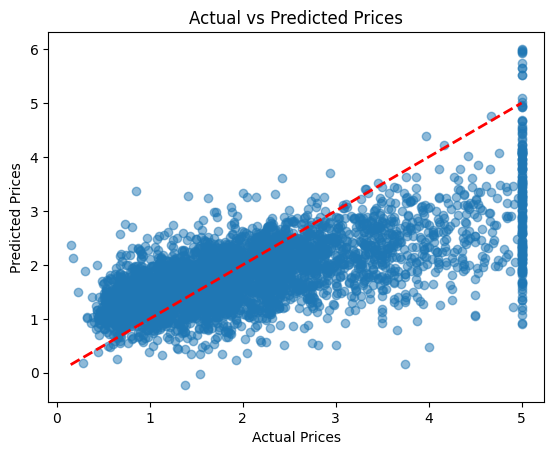

In [ ]:
# Convert the predictions and targets back to numpy arrays
valid_preds_np = valid_preds.squeeze().numpy()
valid_targets_np = valid_targets.numpy()

# Plot actual vs predicted prices
plt.scatter(valid_targets_np, valid_preds_np, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(valid_targets_np), max(valid_targets_np)], [min(valid_targets_np), max(valid_targets_np)], 'r--', lw=2)
plt.show()

<a name="p3.2"></a>

---
### **Part #3.2: Different Activation Functions**
---

Now repeat the process above with a neural net of the same shape (number of layers/neurons), but with hidden layer activation function as "sigmoid" instead of "relu". Part of the challenge here is knowing what to change and what to keep and then fitting it all into the cell below.

<br>

**NOTE**: This will look like a lot of code, but almost all of it will be identical to what you have done above!

In [ ]:
# Steps 3 - 6: Building
#======================
# COMPLETE THE CODE HERE TO BUILD THE NN


# Step 7: Fitting
#================
# COMPLETE THE CODE HERE TO FIT THE NN TO THE TRAINING DATA


# Step 8: Evaluating
#===================
# COMPLETE THE CODE HERE TO EVALUTE AND VISUALIZE THE MODEL

<a name="p4"></a>

---
## **Part #4: Independent Work**
---


In this section, you will build and fit a NN model to the another dataset `winequality-red.csv`. This dataset rates the quality of red variants of the Portuguese "Vinho Verde" wine according to a variety of chemical properties.

In particular, these are the available features:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

**You will use deep learning for regression to predict this variable**:
12. quality (continuous score between 0 and 10)

#### **Problem #1: Load the dataset and split into training and test**
---

In [ ]:
# Load the dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSXznmcXoHsnmcRgMl-4UQK_O0xsjHOgknGTzZGWwUP6vHffTYJ2-_QNtwmJCbELi8in3msD3dVFTzF/pub?gid=456238604&single=true&output=csv"
df = pd.read_csv(url)

# Split the dataset into features and target
X = df# COMPLETE THIS LINE
y = df# COMPLETE THIS LINE

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = # COMPLETE THIS LINE TO SPLIT THE DATA

**Run the code provided below to scale the data, convert to PyTorch, and define DataLoaders.**

In [ ]:
# Standardize the input features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# This is another method to convert to tensors using Python's map function
X_train, y_train = map(lambda x: torch.tensor(x, dtype=torch.float32), (X_train, y_train))
X_valid, y_valid = map(lambda x: torch.tensor(x, dtype=torch.float32), (X_valid, y_valid))

# Define the DataLoaders
train_dl = DataLoader(list(zip(X_train, y_train.unsqueeze(1))), batch_size=64, shuffle=True)
valid_dl = DataLoader(list(zip(X_valid, y_valid.unsqueeze(1))), batch_size=64)
dls = DataLoaders(train_dl, valid_dl)

#### **Problem #2: Determine the dimensions of the data**
---

Look at the shape of the data to determine the number of input neurons needed.

#### **Problem #3: Build the model**
---

Build a NN such that it has:
* The correct number of input neurons.
* Two hidden layers of size 16 with an appropriately picked activation function.
* One output neuron that has an appropriately picked activation function.

<br>

**Hint:** We will treat this as a regression problem, so you can refer to the work we did on the California Housing dataset.

In [ ]:
# Define the neural network architecture


#### **Problem #4: Fit the model**
---

1. Define the loss functio using `nn.MSELoss()`.

2. Create the `Learner` object. We will use root-mean-squared-error (RMSE) as the metric.

3. Fit the model. We will use 10 epochs and a learning rate of `0.001`.


**NOTE**: Consider trying different values for these parameters (learning rate and number of epochs) to start getting a feel for the role they play.

In [ ]:
# Define the loss function

# Create the Learner object

# Train the model


#### **Problem #5: Evaluate and visualize the model**
---

Using the same approach as in the previous problems, evaluate this model and visualize its predictions versus the actual values in the test data.

In [ ]:
# Evaluate the model on the validation set
valid_preds, valid_targets = # FILL IN CODE HERE
rmse_score = rmse(valid_preds, valid_targets)
print("Validation RMSE:", rmse_score.item())

# Convert the predictions and targets back to numpy arrays
valid_preds_np = valid_preds.squeeze().numpy()
valid_targets_np = valid_targets.numpy()

# Plot actual vs predicted prices
plt.scatter(#FILL IN INPUTS HERE, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(valid_targets_np), max(valid_targets_np)], [min(valid_targets_np), max(valid_targets_np)], 'r--', lw=2)
plt.show()

#### **Problem #6: Visualize the loss after each epoch**
---

**Run the code provided below to visualize the loss after each epoch.**


Some questions to consider:
* Does the loss tend to increase or decrease?
* Should we have let the model train for more epochs?
* Could we have gotten away with fewer epochs?


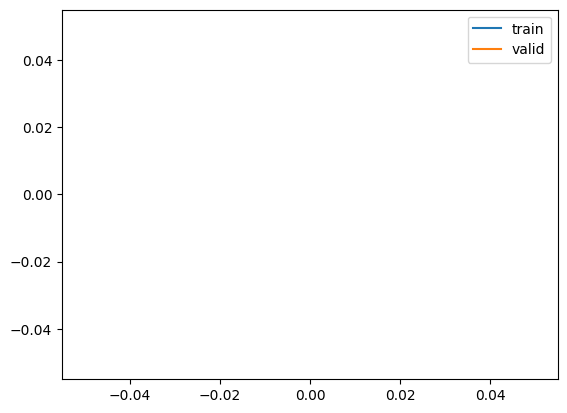

In [ ]:
learn.recorder.plot_loss()

In [ ]:
"""

# ANSWER THE REFLECTION QUESTIONS HERE

""";

<a name="p5"></a>

---
## **Part #5: [ADDITIONAL PRACTICE] Building Neural Networks**
---





#### **Problem #5.1:**

Create and visualize a new model with 2 hidden layers.

* The input layer should have `4` neurons

* The first hidden layer should have `6` neurons with activation function: `"tanh"`

* The second hidden layer should have `5` neurons with activation function: `"relu"`

* The output layer should have `3` neurons with activation function: `"sigmoid"`

#### **Problem #5.2:**

Create and visualize a new model with three hidden layers.

* The input layer should have `12` neurons

* The first hidden layer should have `4` neurons with sigmoid activation.

* The second hidden layer should have `8` neurons with ReLU activation function.

* The third hidden layer should have `2` neurons with no activation.

* The output layer should have `1` neurons.

#End of notebook
---
© 2023 The Coding School, All rights reserved